In [12]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import pickle
import warnings

In [13]:
warnings.filterwarnings("ignore")

In [14]:
df = pd.read_csv('encoded_data.csv')

In [15]:
x = df.drop('Prediabetes Status', axis=1)
y = df['Prediabetes Status']

In [16]:
smote = SMOTE(random_state=42)
x_amplified, y_amplified = smote.fit_resample(x, y) 

X_train, X_test, y_train, y_test = train_test_split(x_amplified, y_amplified, test_size=0.2, random_state=42)

In [17]:
base_estimator = DecisionTreeClassifier(max_depth=3, random_state=42)  
ada_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=500, random_state=42)


ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=42),
                   n_estimators=500, random_state=42)

In [18]:
train_predictions = ada_classifier.predict(X_train)
test_predictions = ada_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

train_precision = precision_score(y_train, train_predictions)
test_precision = precision_score(y_test, test_predictions)

train_recall = recall_score(y_train, train_predictions)
test_recall = recall_score(y_test, test_predictions)

train_f1 = f1_score(y_train, train_predictions)
test_f1 = f1_score(y_test, test_predictions)

train_conf_matrix = confusion_matrix(y_train, train_predictions)
test_conf_matrix = confusion_matrix(y_test, test_predictions)


print("Training Accuracy: {:.2f}".format(train_accuracy))
print("Training Precision: {:.2f}".format(train_precision))
print("Training Recall: {:.2f}".format(train_recall))
print("Training F1-score: {:.2f}".format(train_f1))
print("\nTest Accuracy: {:.2f}".format(test_accuracy))
print("Test Precision: {:.2f}".format(test_precision))
print("Test Recall: {:.2f}".format(test_recall))
print("Test F1-score: {:.2f}".format(test_f1))
print("\nConfusion Matrix for Training Data:")
print(train_conf_matrix)
print("\nConfusion Matrix for Test Data:")
print(test_conf_matrix)

Training Accuracy: 0.93
Training Precision: 0.92
Training Recall: 0.95
Training F1-score: 0.93

Test Accuracy: 0.80
Test Precision: 0.89
Test Recall: 0.73
Test F1-score: 0.80

Confusion Matrix for Training Data:
[[36  3]
 [ 2 35]]

Confusion Matrix for Test Data:
[[8 1]
 [3 8]]


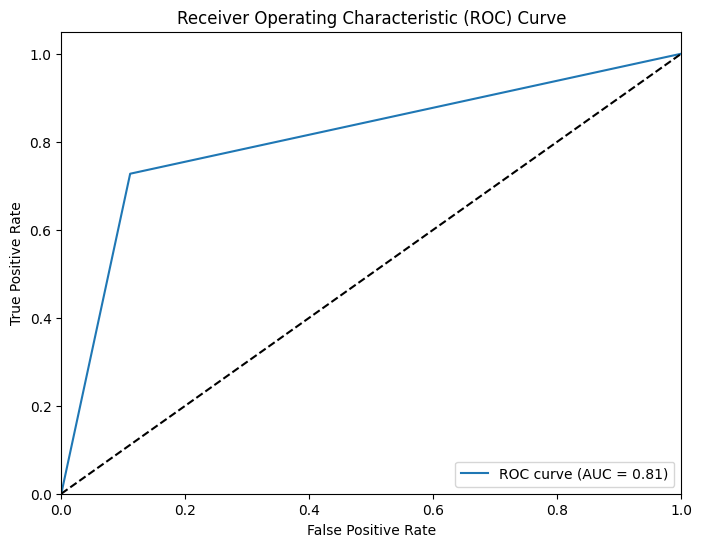

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

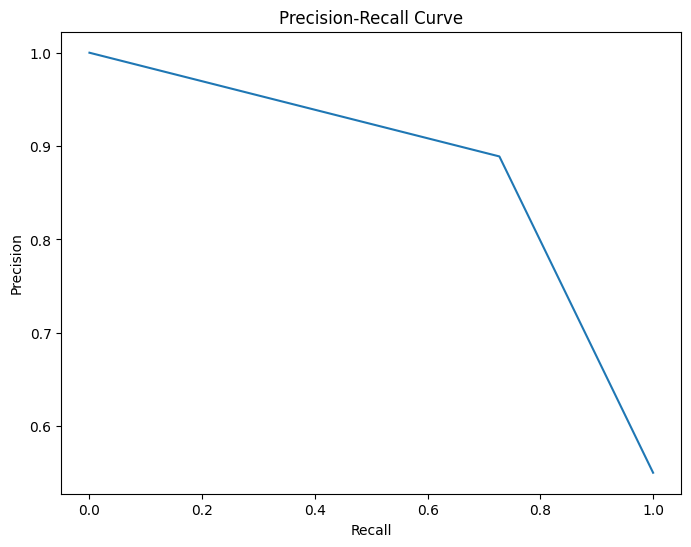

In [20]:
from sklearn.metrics import precision_recall_curve

# Calculate the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, test_predictions)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

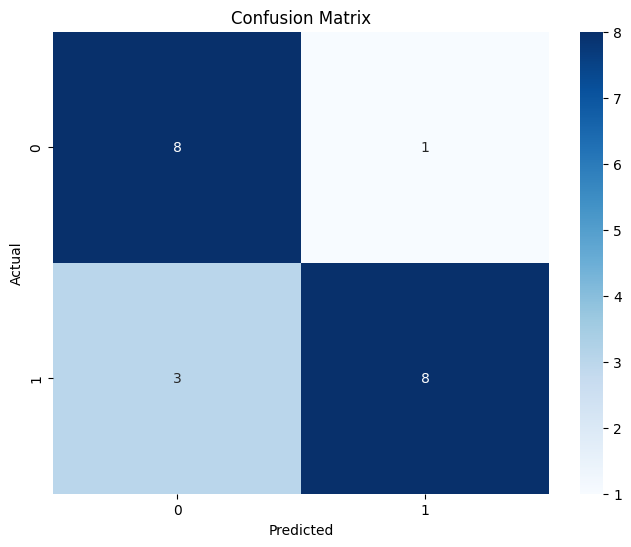

In [21]:
import seaborn as sns

# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

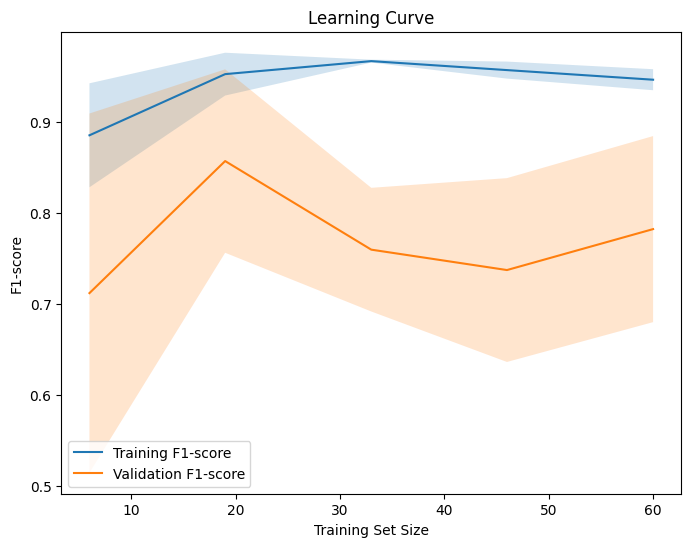

In [22]:
from sklearn.model_selection import learning_curve

# Calculate the learning curve
train_sizes, train_scores, validation_scores = learning_curve(
    ada_classifier, X_train, y_train, cv=5, scoring='f1')

# Calculate the mean and standard deviation for train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training F1-score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2)
plt.plot(train_sizes, validation_scores_mean, label='Validation F1-score')
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('F1-score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()